<a href="https://colab.research.google.com/github/truongkhng/AI-Projects/blob/main/Self_Face_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [5]:
def create_img_dataset(raw_folder,dataset_name):

    target_size = (150, 150)
    pictures = []
    labels = []

    for folder in listdir(raw_folder):
      #print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        #print("File=", file)
        pictures.append(cv2.resize(cv2.imread(raw_folder + "/" + folder + "/" + file)
                                              ,dsize = target_size))
        labels.append(folder)

    pictures = np.array(pictures)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)

    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)

    file.close()

def load_data(dataset_path):

    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()

    return pictures, labels

In [6]:
raw_folder = "/content/drive/MyDrive/face_r"

create_img_dataset(raw_folder= raw_folder,dataset_name= 'face_r.txt')
x_data,y_data = load_data(dataset_path= 'face_r.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1188, 150, 150, 3)
(1188, 1)
(297, 150, 150, 3)
(297, 1)


In [8]:
x_test_original = x_test;
y_test_original = y_test;
x_label = ['Ban Truong','Khac']

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)

In [9]:
model = Sequential()
model.add (Conv2D(32,(5,5),activation='relu',kernel_initializer='normal',padding='same',
                  input_shape=(150,150,3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      25632     
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                        

In [13]:
checkpoint = ModelCheckpoint(filepath= "SelfFace-weights-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=50,batch_size = 128,validation_data=(x_test,y_test),verbose=1,callbacks=callbacks_list)

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 3.4317e-08 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.54209, saving model to SelfFace-weights-01-0.5421.h5
10/10 [==============================] - 5s 375ms/step - loss: 3.4317e-08 - accuracy: 1.0000 - val_loss: 12.8378 - val_accuracy: 0.5421
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 9.0310e-10 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.54209
10/10 [==============================] - 4s 364ms/step - loss: 9.0310e-10 - accuracy: 1.0000 - val_loss: 24.6033 - val_accuracy: 0.3704
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9983
Epoch 3: val_accuracy improved from 0.54209 to 0.97306, saving model to SelfFace-weights-03-0.9731.h5
10/10 [==============================] - 3s 350ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.1230 - val_accuracy: 0.9731
Epoch 4/50
10/10 [==============================] - ETA

In [14]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0


In [15]:
model_json = model.to_json()
with open('SelfFace_config.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

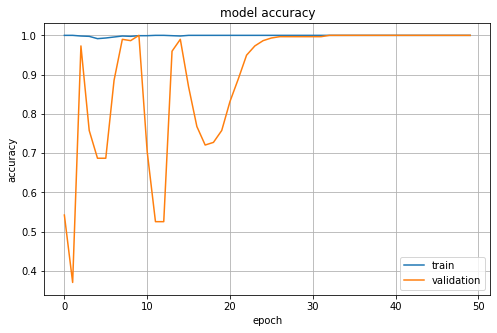

In [24]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()